# Load Data

In [1]:
import pickle
file = open('y_train_b', 'rb')

# dump information to that file
y_train = pickle.load(file)

# close the file
file.close()

In [2]:
import pickle
file = open('X_train_b', 'rb')

# dump information to that file
X_train = pickle.load(file)

# close the file
file.close()

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

## Color Change

In [4]:
X_train=np.stack([X_train]*3, axis=-1)

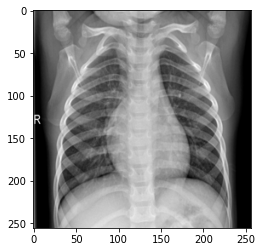

In [5]:
plt.imshow(X_train[2])

# Transfer learning 

In [6]:
from tensorflow.keras.applications.vgg16 import preprocess_input

X_train=tf.keras.applications.vgg16.preprocess_input(
    X_train, data_format=None
)

In [7]:
X_train[0].min()

-123.68

In [ ]:
#X_trans[0].min()

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, Sequential
from tensorflow.keras import models


def load_model():
    model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
    return model

In [9]:
model=load_model()

In [10]:
def set_nontrainable_layers(model):
    model.trainable = False
    return model

In [11]:
set_nontrainable_layers(model)

In [12]:
def add_last_layers(model):
    base_model = load_model()
    base_model = set_nontrainable_layers(base_model)
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(4, activation='softmax')
    model = Sequential([
    base_model,
    flattening_layer,
    dense_layer,
    prediction_layer])
    return model

In [13]:
model = add_last_layers(model)

In [14]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=1e-4)

def compile_model(model):
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

In [15]:
def build_model():
    model=load_model()
    model=add_last_layers(model)
    model=compile_model(model)
    return model

In [16]:
model = build_model()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


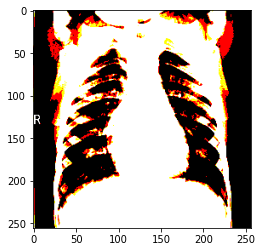

In [17]:
plt.imshow(X_train[2])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights=True)

In [19]:
history = model.fit(X_train,y_train,
          batch_size=16,
          epochs=50, validation_split=0.2, callbacks=[es])

Epoch 1/50
150/150 [==============================] - 1012s 7s/step - loss: 3.5280 - accuracy: 0.7364 - val_loss: 1.2230 - val_accuracy: 0.7688
Epoch 2/50
150/150 [==============================] - 1083s 7s/step - loss: 0.3796 - accuracy: 0.8939 - val_loss: 1.4793 - val_accuracy: 0.7772
Epoch 3/50
150/150 [==============================] - 1008s 7s/step - loss: 0.1496 - accuracy: 0.9435 - val_loss: 1.1418 - val_accuracy: 0.7822
Epoch 4/50
150/150 [==============================] - 1150s 8s/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 1.3885 - val_accuracy: 0.7822
Epoch 5/50
150/150 [==============================] - 1161s 8s/step - loss: 0.0475 - accuracy: 0.9831 - val_loss: 1.4891 - val_accuracy: 0.7973
Epoch 6/50
150/150 [==============================] - 892s 6s/step - loss: 0.1008 - accuracy: 0.9778 - val_loss: 1.2069 - val_accuracy: 0.7839
Epoch 7/50
150/150 [==============================] - 814s 5s/step - loss: 0.0520 - accuracy: 0.9848 - val_loss: 1.4487 - val_accuracy: 0

In [20]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()
    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

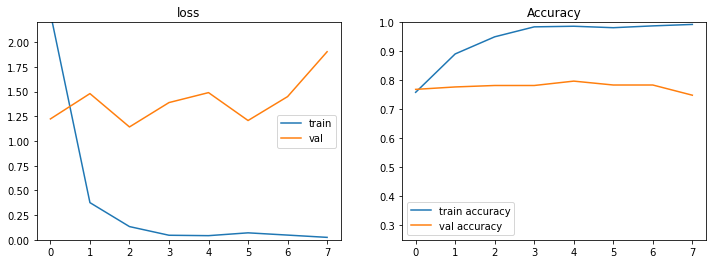

In [21]:
import matplotlib.pyplot as plt
plot_history(history)
plt.show()

In [22]:
from tensorflow.keras import models
# Let's say that you have a `model`
# You can save it :
models.save_model(model, '/Users/davidmedioni/code/dino120798/finalproject/model2')

INFO:tensorflow:Assets written to: /Users/davidmedioni/code/dino120798/finalproject/model2/assets


In [ ]:
! pwd

In [23]:
from tensorflow.keras import models
loaded_model = models.load_model('/Users/davidmedioni/code/dino120798/finalproject/model2')

In [ ]:
loaded_model